# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/collinlyou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


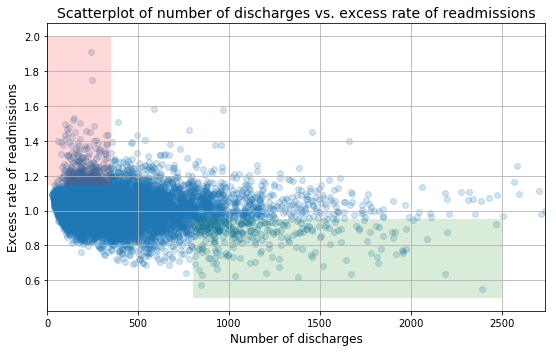

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

* Evaluating Part A: 
    * I agree with the plot created in the preliminary report and the inferences drawn from it. I've re-created the preliminary report's graph below and added a trendline to show that there does seem to be a small negative trend.
* Evaluating Part B: 
    * I agree with the statistics provided here. I've done my own analysis of these numbers and they are correct.
    * However, these numbers do not provide the full context or any statistical support for making the claim that a statistically significant difference exists between hospital capacity and re-admission rates. The preliminary report arbitrarily takes n < 100 and n > 1000 as the primary groups to compare; this leaves out a large swath of data (100 < n < 1000) that could lead to better insights.
* Evaluating Part C:
    * I do not agree with this assessment. The preliminary report shows no statistical analyses to show that a statistically significant difference exists between hospital capacity and re-admission rates. A report cannot claim that a "significant" correlation exists without conducting a statistical analysis.  
* Evaluating Part D: 
    * The report focuses on hospitals with a small number of discharges (n < 100) versus ones with a large number of discharges (n > 1000). However, the policy recommendations are for hospitals with a capacity of n < 300. The data does not reveal hospital capacity and it is therefore unwise to make recommendations for hospitals with a capacity of n < 300 when we do not know enough about the relationship between hospital readmission ratios, discharges, and hospital capacity to make a decision informed by data. 
    * Any recommended policy changes should not be implemented until a statistical analysis has been done to corroborate the conclusions from the data. 


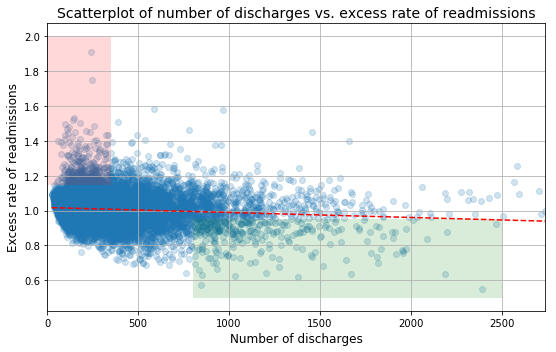

In [5]:
# Checking the overall trendline for the data 
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# adds a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r----")

In [6]:
# Checking the statistics in Part B of the preliminary report 

clean_hospital_read_df

# converts the number of discharges from 'O' object type to 'int' object type
clean_hospital_read_df['Number of Discharges'] = pd.to_numeric(clean_hospital_read_df['Number of Discharges'])

# renaming the 'Number of Discharges' column to select data
clean_hospital_read_df['NumDischarges'] = clean_hospital_read_df['Number of Discharges']

# under 100 discharges 
under_100_df = clean_hospital_read_df[clean_hospital_read_df.NumDischarges < 100]
print("Readmit Ratio for hospitals with less than 100 discharges:", under_100_df['Excess Readmission Ratio'].mean())

# over 1000 discharges 
over_1000_df = clean_hospital_read_df[clean_hospital_read_df.NumDischarges > 1000]
print("Readmit Ratio for hospitals with over 1000 discharges:", over_1000_df['Excess Readmission Ratio'].mean()) 

Readmit Ratio for hospitals with less than 100 discharges: 1.0226183501683506
Readmit Ratio for hospitals with over 1000 discharges: 0.9783354211663071


### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

##### 1. Setup an appropriate hypothesis test

$H_0: \overline{X}_{discharges\;<\;100} = \overline{X}_{discharges\;>\;1000}$

There is no statistical significance between the mean readmittance ratios of hospitals with n < 100 discharges and hospitals with n > 1000 discharges

$H_A: \overline{X}_{discharges\;<\;100} ≠ \overline{X}_{discharges\;>\;1000}$

There is a statistical significance between the mean readmittance ratios of hospitals with n < 100 discharges and hospitals with n > 1000 discharges

##### 2. Compute and report the observed significance value (or p-value).

In [7]:
# Finding the 95% CI for each set 

# Find and isolate the number of ratios in each set 
num_100 = under_100_df['Excess Readmission Ratio'].count()
num_1000 = over_1000_df['Excess Readmission Ratio'].count()

print("Number of hospitals which have fewer than 100 discharges:", num_100)
print("Number of hospitals which have greater than 1000 discharges:", num_1000)

# Find the standard of each
se_100 = under_100_df['Excess Readmission Ratio'].std()**2 / num_100
se_1000 = over_1000_df['Excess Readmission Ratio'].std()**2 / num_1000

# Find the overall standard error 
se_total = np.sqrt(se_100 + se_1000)

# calculate the margin of error based on 95% confidence interval 
upper = se_total * 1.96
lower = se_total * -1.96

print('The lower bound of the 95% CI is:', lower)
print('The upper bound of the 95% CI is:', upper)

Number of hospitals which have fewer than 100 discharges: 1188
Number of hospitals which have greater than 1000 discharges: 463
The lower bound of the 95% CI is: -0.011417716632
The upper bound of the 95% CI is: 0.011417716632


We have a large enough sample size of both (n < 100) and (n > 1000) to make statistical inferences from. 

In [8]:
# Find the difference of the means
diff_mean = under_100_df['Excess Readmission Ratio'].mean() - over_1000_df['Excess Readmission Ratio'].mean()
print("The mean differences is: ", diff_mean)

# Find the T-Score
Tscore = diff_mean / se_total
print("The T-score is: ", Tscore)

The mean differences is:  0.04428292900204345
The T-score is:  7.6017424185


The difference in the means shows that their difference is likely not due to chance, since its value is well past the upper bound of the 95% CI; The Z-score is extremely high at 7.6. This means that there is a statistically significant difference between the readmittance ratios at larger hospitals (n > 1000) versus smaller hospitals (n < 100). 

In [9]:
# Find the p-value 
import scipy.stats as st

# we find the cumulative distribution of the t-statistic
cdf_t = st.norm.cdf(Tscore)

# we can calculate the p-value by subtracting the cdf from 1 
pval = 1 - cdf_t
print("The P-value is:", pval)

The P-value is: 1.46549439251e-14


The P-value is tiny relative to the $\alpha$ value (0.05) so we can safely assume that the difference of the means is statistically significant. 

##### 3. Report statistical significance for  α = .01.

In [10]:
# Find the 99% CI where alpha = 0.01
new_upper = se_total * 2.576
new_lower = se_total * -2.576

print('The lower bound of the 99% CI is:', new_lower)
print('The upper bound of the 99% CI is:', new_upper)

The lower bound of the 99% CI is: -0.0150061418592
The upper bound of the 99% CI is: 0.0150061418592


We can see that the difference of the means (~0.044) is still well outside the 99% CI [-0.015, 0.015] where $\alpha = 0.01$. This shows that there is no doubt there is a statistical difference between the two groups of hospitals. 

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical signifiance indicates that the difference of the means is not likely due to chance; there is some correlation between hospital capacity and excess rates of readmission that is borne out in the data. Practically speaking, this does not mean that excess rates of readmission is directly caused by hospital capacity. There are an entire host of other reasons why excess rates of readmission could be correlated with hospital capacity. For example, large hospitals might have more financial resources with more skilled staff versus smaller hospitals, which might not have access to either. 

Before making any concrete policy changes, it would be prudent to determine what third variables might be affecting the excess rates of readmission. 

#### 5. Look at the scatterplot above: 
* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.

##### Advantages:
* We can see all of the data in one plot, giving us better context to draw conclusions about our data 
    * This is advantageous because we can spot trends that may appear in the excluded region (100 < n < 1000) that do not appear in the compared regions (n < 100 & n > 1000). 
    * A general trendline can be applied to the entire dataset more easily 
    
##### Disadvantages:
* The highlighted areas [0,350] & [800,2500] are not explicitly the areas the preliminary area makes statistical claims about (n < 100 & n > 1000). We therefore want to focus exclusively on these areas. 
* General trends between two groups of a continous dataset are harder to spot
* This plot includes data that was not explicitly compared in the preliminary report (i.e. 100 < n < 1000); this adds unnecessary noise to the graph

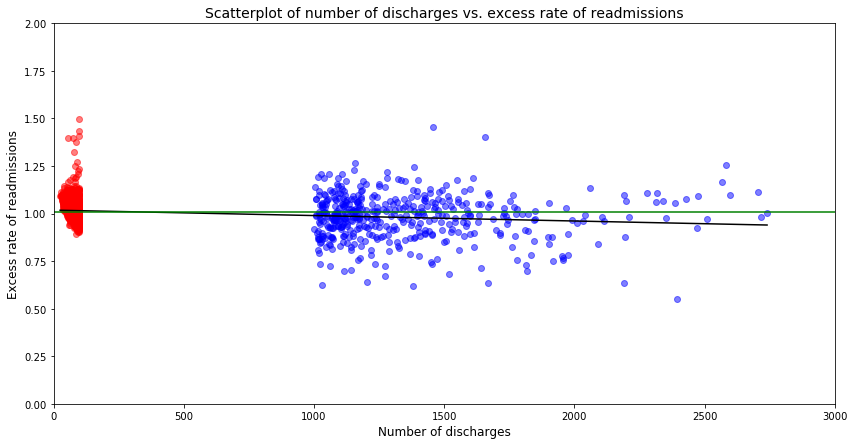

In [11]:
# new scatter plot showing just the compared ranges [0,99] & [1000,]
smallPlot = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
smallPlot.dropna()
smallPlot_x = smallPlot['Number of Discharges']
smallPlot_y = smallPlot['Excess Readmission Ratio']

largePlot = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
largePlot.dropna()
largePlot_x = largePlot['Number of Discharges']
largePlot_y = largePlot['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(smallPlot_x, smallPlot_y, color='red', alpha=0.5)
plt.scatter(largePlot_x, largePlot_y, color='blue', alpha=0.5)

plt.xlim([0, 3000]);
plt.ylim([0, 2.0]);
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# adds a black trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"-", color='black')

# adds the mean excess rate of readmissions ratio as a horizontal green line 
tot_mean = clean_hospital_read_df['Excess Readmission Ratio'].dropna().mean()
plt.axhline(y=tot_mean, color='green', linestyle='-')

In [47]:
import statsmodels.api as sm

# dis = len(clean_hospital_read_df['Number of Discharges'].dropna()
new = clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges']]
new = new.dropna()

# Checking to see if any items are still left as NaN 
new['Number of Discharges'].isnull().sum()

# Running the logistic regression using statsmodels.api 
logit = sm.Logit(new['Excess Readmission Ratio'], new['Number of Discharges'])
result = logit.fit()

ValueError: endog must be in the unit interval.

In [52]:
x = sm.OLS(new['Excess Readmission Ratio'], new['Number of Discharges'])
y = x.fit()
print(y.summary())

                               OLS Regression Results                               
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.570
Model:                                  OLS   Adj. R-squared:                  0.570
Method:                       Least Squares   F-statistic:                 1.524e+04
Date:                      Thu, 07 Sep 2017   Prob (F-statistic):               0.00
Time:                              13:58:37   Log-Likelihood:                -11595.
No. Observations:                     11497   AIC:                         2.319e+04
Df Residuals:                         11496   BIC:                         2.320e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
# Stats model API - logistic regression function 
# Results: CI, P-values 
# Does not have to be plotted on a graph 
# Values are called regression analysis (will also give the p-values)

We also may want to observe the trendline within hospitals 
